Expectation–Maximization (EM) Algorithm Lab
-----


By The End Of This Session You Should Be Able To:
----
- Apply EM to find the mixture of two Guassian Distrubtions

In [1]:
reset -fs

In [2]:
from random import uniform
from math import sqrt, log, exp, pi

import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, std
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("../data/em_example.csv")
df.head(n=2)

,x
0,0.252851
1,-1.034562


__TODO__: Plot distribution

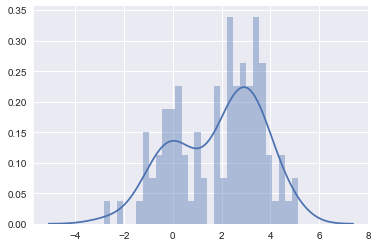

In [4]:
sns.distplot(df, bins=30);

__TODO__: Is the normal distribution a useful model for the data?

Not really. It's bimodal, so a gaussian won't model the data well.

__TODO__: Plot a Kernel Density Estimation (KDE) on the data:

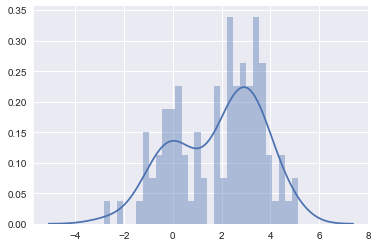

In [5]:
sns.distplot(df, bins=30);

__TODO__:  What model should we fit?

Gaussian mixture model

__TODO__:  Define the model:

<br>
<details><summary>
Click here for a small hint…
</summary>
The model is should be the simplest that is able generate that figure
</details>
<br>
<details><summary>
Click here for a big hint…
</summary>
The model is two Normal distributions
</details>

Let $X$ be the observed values, $Z$ be the assignment of a single observed value to one of two gaussian distributions, $p$ be the proportion of samples drawn from distribution 1, and $\boldsymbol{\theta}$ be the individual parameters of the 2 gaussians.

$$X = x_1,\space x_2,...,\space x_n,\space x_i \in \mathbb{R}^m$$
$$Z \sim {Bernoulli}(p),\space p \in [0, 1]$$
$$\boldsymbol{\theta} = \mu_1,\space \mu_2,\space \sigma^2_1,\space \sigma^2_2$$

__TODO__:  List the model parameters:

<br>
<details><summary>
Click here for a small hint…
</summary>
There are 5 paramaters
</details>
<br>
<details><summary>
Click here for a big hint…
</summary>
There are 5 paramaters: 4 of the them are Normal distributions, the last one is the probability of choosing one of them
</details>


$\mu$ and $\sigma^2$ for each of the 2 gaussians, and $p$, the proportion of data points in gaussian 1

__TODO__:  Define the probability density function (PDF):

recall that for $X \sim N(\mu,\space \sigma^2)$, $f(x\space |\space \mu, \space\sigma^2) = \frac{e^{-\frac{(x - \mu^2)}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}}$

$$f(x\space |\space p) = p*{f(x\space|\space\mu_1, \space\sigma^2_1)} + (1-p)*f(x\space |\space \mu_2, \space\sigma^2_2), \space p \in [0, 1]$$

$X$ is the observed data, $Z$ is the unobserved class membership.   

Let $Z = 1$ if the data comes from the first Normal, and $0$ otherwise, then $E(Z) = w$. 

__TODO__:  Write the E  step. Either formally or informally.

Given estimated values of $\boldsymbol{\theta}$, set $z_i = {argmax}_z \space f(x_i | z)$ 

__TODO__:  Write the M step. Either formally or informally.

Given class distributions $Z$, set $\boldsymbol{\theta} = {argmax}_\theta \ln{f(X, Z)}$

In [6]:
class Gaussian:
    "Model univariate Gaussian"

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y


In [7]:
# TODO:  Complete Gaussian Mixture class 
class GaussianMixture:
    "Model mixture of two univariate Gaussians and their EM estimation"

    def __init__(self, data, sigma_min=.1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(mu=np.random.uniform(data.min(), data.max()),
                            sigma=np.random.uniform(sigma_min, sigma_max)) 
        self.two = Gaussian(mu=np.random.uniform(data.min(), data.max()),
                            sigma=np.random.uniform(sigma_min, sigma_max))
        self.mix = mix

    def Estep(self):
        "Perform an E(stimation)-step, freshening up self.loglike in the process"
        self.z = np.array([self.one.pdf(x)*self.mix/np.sum([self.one.pdf(x)*self.mix, self.two.pdf(x)*(1-self.mix)]) for x in self.data])

    def Mstep(self):
        "Perform an M(aximization)-step"
        self.mix = self.z.mean()
        self.one.mu = np.dot(self.z, self.data)/(np.sum(self.z)+ 1e-5)
        self.one.sigma = np.dot(self.z, (self.data - self.one.mu)**2)/(np.sum(self.z) + 1e-5)
        self.two.mu = np.dot(1-self.z, self.data)/(np.sum(1-self.z)+ 1e-5)
        self.two.sigma = np.dot(1-self.z, (self.data - self.two.mu)**2)/(np.sum(1-self.z) + 1e-5)

        
    def iterate(self, N=1):
        "Perform N iterations, then compute log-likelihood"
        for _ in range(N):
            self.Estep()
            self.Mstep()
            if np.isclose(self.mix, 0) or np.isclose(self.mix, 1):
                break
    
    def log_likelihood(self):
        data_1 = self.data[self.z >= .5]
        data_2 = self.data[self.z < .5]
        log_like_1 = np.sum(np.log(self.one.pdf(x)) for x in data_1)
        log_like_2 = np.sum(np.log(self.two.pdf(x)) for x in data_2)
        return log_like_1 + log_like_2
    
    def pdf(self, x):
        return (self.mix)*self.one.pdf(x) + (1-self.mix)*self.two.pdf(x)

    def __repr__(self):
        return 'GaussianMixture({0}, {1}, mix={2.03})'.format(self.one, 
                                                        self.two, self.mix)

    def __str__(self):
        return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.one, 
                                                        self.two, self.mix)

In [8]:
data = np.array(df.x)

In [9]:
# TODO: Find best single Gaussian model

In [10]:
x_bar = data.mean()
x_var = data.var()
best_gaussian = Gaussian(x_bar, x_var)
print(best_gaussian)

Gaussian(1.86285, 3.13367)


In [11]:
# TODO: Find best Mixture Gaussian model

In [12]:
import warnings
warnings.filterwarnings('ignore')

n_restarts = 10000
best_loglikelihood = -np.inf
g_mix = None

for _ in range(n_restarts):
    g_mm = GaussianMixture(data)
    g_mm.iterate(N=10)
    log_like = g_mm.log_likelihood()
    if (log_like > best_loglikelihood) and ((g_mm.mix > .1) and (g_mm.mix < .9)):
        best_log_like = log_like
        g_mix = g_mm

In [13]:
print('Best Guassian Mixture:')
print('1st Guassian: μ = {:.2}, σ = {:.2}'.format(g_mix.one.mu, g_mix.one.sigma))
print('2nd Guassian: μ = {:.2}, σ = {:.2}'.format(g_mix.two.mu, g_mix.two.sigma))
print(f'Guassian mixture: {g_mix.mix:.2}')

print("""

Should be ~ like this:
Best Guassian Mixture:
1st Guassian: μ = 2.6, σ = 1.2
2nd Guassian: μ = -0.48, σ = 0.8
Guassian mixture: 0.75
""")

Best Guassian Mixture:
1st Guassian: μ = -0.18, σ = 0.78
2nd Guassian: μ = 3.0, σ = 0.74
Guassian mixture: 0.36


Should be ~ like this:
Best Guassian Mixture:
1st Guassian: μ = 2.6, σ = 1.2
2nd Guassian: μ = -0.48, σ = 0.8
Guassian mixture: 0.75



----
Challenge Activities
------

Plot the estimated pdfs, univariate and mixture:

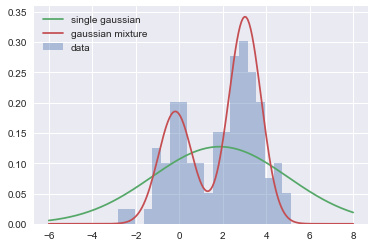

In [16]:
sns.distplot(data, bins=20, kde=False, norm_hist=True, label='data')
x = np.linspace(-6, 8, 200)
g_1 = stats.norm(g_mix.one.mu, g_mix.one.sigma).pdf(x)
g_2 = stats.norm(g_mix.two.mu, g_mix.two.sigma).pdf(x)
g_both = [g_mix.pdf(e) for e in x]
g_single = stats.norm(best_gaussian.mu, best_gaussian.sigma).pdf(x)
#sns.plt.plot(x, g_1, label='gaussian 1')
#sns.plt.plot(x, g_2, label='gaussian 2')
sns.plt.plot(x, g_single, label='single gaussian')
sns.plt.plot(x, g_both, label='gaussian mixture')
sns.plt.legend();

In [ ]:
sns.kdeplot(stats.norm(-0.16761999006936099,0.82085813149246989).rvs(500),label='N1')
sns.kdeplot(stats.norm(3.0268105658433542,0.81077573585302898).rvs(500),label='N2')
plt.hist(df.x, normed=True,label='true data');

<br>
<br>